## Library




In [1]:
# Import some libraries

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

!pip install twint
import twint
import nest_asyncio
nest_asyncio.apply()


import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import EarlyStopping
# from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.0/415.0 kB 34.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 17.8 MB/s eta 0:00:00
  Created wheel for twint: filename=twint-2.1.20-py3-none-any.whl size=33911 sha256=e9cd3ce4264783458b4e61e8d338a4ff55437fa56e5e0ba825a9dccff1eabb1f
  Stored in directory: /root/.cache/pip/wheels/48/d2/f5/7a71ea8b6788b85fac82abf4ef84dac03562571f695c3b8f77
  Created wheel for cchardet: filename=cchardet-2.1.7-cp310-cp310-linux_x86_64.whl size=289261 sha256=44bd2bd73fc3c07b1f2fb934b840016a547

# Preprocessing

In [2]:
# Load data from a CSV file into pandas DataFrame

tweets = pd.read_csv('https://raw.githubusercontent.com/Kurniaman/ETIKA_TI_Sentiment/main/ikn-fix.csv', delimiter=',')
tweets

,label,label_awal,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,neutral,neutral,Fri Sep 22 23:33:59 +0000 2023,1705364853005902019,Keseruan Bapak @erickthohir di IKN bersama Bap...,0,0,0,0,in,7.135625e+08,1705364853005902019,cecengmuslih,https://twitter.com/cecengmuslih/status/170536...
1,neutral,neutral,Fri Sep 22 22:46:33 +0000 2023,1705352915320549774,Presiden turut berharap kehadiran RS Abdi Walu...,0,0,0,0,in,2.568886e+08,1705352915320549774,yuliakhmada,https://twitter.com/yuliakhmada/status/1705352...
2,neutral,neutral,Fri Sep 22 20:47:06 +0000 2023,1705322852483043820,"@KompasTV Merdu kan bu? Nah, rumahnya yg di p...",0,0,0,0,in,1.538273e+18,1705225759013621941,bakso_kanji,https://twitter.com/bakso_kanji/status/1705322...
3,negative,negative,Fri Sep 22 20:05:35 +0000 2023,1705312405465833775,@KompasTV Kalau yang ngomong dari tahun 2012 s...,0,0,0,0,in,1.338293e+18,1704859638511133005,Andra89996910,https://twitter.com/Andra89996910/status/17053...
4,neutral,neutral,Fri Sep 22 18:01:58 +0000 2023,1705281298695332182,"Hadiri Malam Apresiasi Nusantara, Presiden: Te...",0,0,0,0,in,1.510858e+18,1705281298695332182,Liputan861,https://twitter.com/Liputan861/status/17052812...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,positive,positive,Wed Sep 13 03:24:04 +0000 2023,1701798874417946974,IKN wujud Semangat masyarakat indonesia untuk ...,0,0,0,0,in,1.564445e+18,1701798874417946974,BertaniKodok,https://twitter.com/BertaniKodok/status/170179...
196,positive,positive,Wed Sep 13 03:23:03 +0000 2023,1701798621765648406,Masyarakat Sambut Pembangunan IKN Nusantara #K...,0,0,0,0,in,1.564445e+18,1701798621765648406,BertaniKodok,https://twitter.com/BertaniKodok/status/170179...
197,positive,positive,Wed Sep 13 03:20:06 +0000 2023,1701797879201800315,Masyarakat Kaltim Dukung Pembangunan IKN Nusan...,0,0,0,0,in,1.564445e+18,1701797879201800315,BertaniKodok,https://twitter.com/BertaniKodok/status/170179...
198,positive,positive,Wed Sep 13 02:42:58 +0000 2023,1701788533290303786,@KotaNusantara @erzavindaf @IgoMagaz @Hansunri...,0,0,0,0,in,1.574240e+18,1701726784541352275,jimbe94127701,https://twitter.com/jimbe94127701/status/17017...


In [3]:
# mengambil tweets full text saja
tweets = tweets[['label','full_text']]
tweets.head()

,label,full_text
0,neutral,Keseruan Bapak @erickthohir di IKN bersama Bap...
1,neutral,Presiden turut berharap kehadiran RS Abdi Walu...
2,neutral,"@KompasTV Merdu kan bu? Nah, rumahnya yg di p..."
3,negative,@KompasTV Kalau yang ngomong dari tahun 2012 s...
4,neutral,"Hadiri Malam Apresiasi Nusantara, Presiden: Te..."


In [4]:
# mengganti nama full text menjadi tweet
tweets.rename(columns={'full_text': 'tweet', 'label': 'polarity'}, inplace=True)
tweets.head()

,polarity,tweet
0,neutral,Keseruan Bapak @erickthohir di IKN bersama Bap...
1,neutral,Presiden turut berharap kehadiran RS Abdi Walu...
2,neutral,"@KompasTV Merdu kan bu? Nah, rumahnya yg di p..."
3,negative,@KompasTV Kalau yang ngomong dari tahun 2012 s...
4,neutral,"Hadiri Malam Apresiasi Nusantara, Presiden: Te..."


In [5]:
# tweets =tweets.drop_duplicates(subset=['tweet'])
# tweets.info()
tweets = tweets.drop_duplicates(subset='tweet')

In [6]:
tweets

,polarity,tweet
0,neutral,Keseruan Bapak @erickthohir di IKN bersama Bap...
1,neutral,Presiden turut berharap kehadiran RS Abdi Walu...
2,neutral,"@KompasTV Merdu kan bu? Nah, rumahnya yg di p..."
3,negative,@KompasTV Kalau yang ngomong dari tahun 2012 s...
4,neutral,"Hadiri Malam Apresiasi Nusantara, Presiden: Te..."
...,...,...
195,positive,IKN wujud Semangat masyarakat indonesia untuk ...
196,positive,Masyarakat Sambut Pembangunan IKN Nusantara #K...
197,positive,Masyarakat Kaltim Dukung Pembangunan IKN Nusan...
198,positive,@KotaNusantara @erzavindaf @IgoMagaz @Hansunri...


In [7]:
import nltk
from nltk.stem import WordNetLemmatizer

# Inisialisasi WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Mengunduh data WordNet
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
# Some functions for preprocessing text

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hastag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka

    text = text.replace('\n', ' ') # mengganti new line dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus space character

     # Menghapus kata-kata yang tidak relevan atau yang ingin dihapus
    text = re.sub(r'dan', '', text)
    text = re.sub(r'ikn', '', text)
    text = re.sub(r'di', '', text)
    text = re.sub(r'itu', '', text)
    text = re.sub(r'yg', '', text)

    return text

def lemmatizeText(text):
    # Tokenisasi teks menjadi kata-kata
    words = word_tokenize(text)

    # Lemmatisasi setiap kata dalam teks
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Gabungkan kata-kata yang telah dilematisasi menjadi sebuah teks
    lemmatized_text = ' '.join(lemmatized_words)

    return lemmatized_text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))

    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

####################### tambahan #####################
import re

def removeDuplicateSpaces(text):
    # Mengganti spasi ganda dengan spasi tunggal
    text = re.sub(r'\s+', ' ', text)
    return text

def removeEmails(text):
    # Menghilangkan email dari teks
    text = re.sub(r'\S*@\S*\s?', '', text)
    return text

def removeURLs(text):
    # Menghilangkan URL dari teks
    text = re.sub(r'(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-?=%.]+', '', text)
    return text

def removeSpecialCharacters(text):
    # Menghilangkan karakter khusus seperti emotikon dan simbol matematika
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    return text

def normalizeText(text):
    # Melakukan normalisasi teks (Anda dapat menambahkan logika khusus Anda di sini)
    # Contoh: Mengganti variasi ejaan dengan bentuk standar
    text = re.sub(r'gua', 'aku', text)
    text = re.sub(r'tdk', 'tidak', text)
    # text = re.sub(r'nite', 'night', text)
    return text




In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
# Preprocessing tweets data

tweets['text_clean'] = tweets['tweet'].apply(cleaningText)
tweets['text_clean'] = tweets['text_clean'].apply(casefoldingText)
tweets.drop(['tweet'], axis = 1, inplace = True)

### tambahan ####
tweets['text_clean'] = tweets['text_clean'].apply(removeDuplicateSpaces)
tweets['text_clean'] = tweets['text_clean'].apply(removeEmails)
tweets['text_clean'] = tweets['text_clean'].apply(removeURLs)
tweets['text_clean'] = tweets['text_clean'].apply(removeSpecialCharacters)
# tweets['text_clean'] = tweets['text_clean'].apply(handleRareWords)
tweets['text_clean'] = tweets['text_clean'].apply(normalizeText)
tweets['text_clean'] = tweets['text_clean'].apply(lemmatizeText)
## close tambahan ####

tweets['text_preprocessed'] = tweets['text_clean'].apply(tokenizingText)

tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(filteringText)
tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(stemmingText)


# drop duplicates/spams tweets
tweets.drop_duplicates(subset = 'text_clean', inplace = True)

# Export to csv file
tweets.to_csv(r'data_clean.csv', index = False, header = True,index_label=None)

tweets

,polarity,text_clean,text_preprocessed
0,neutral,keseruan bapak ikn bersama bapak presiden para...,"[seru, ikn, presiden, menteri, artis, influens..."
1,neutral,presiden turut berharap keharan r ab waluyo ik...,"[presiden, harap, keharan, r, ab, waluyo, ikn,..."
2,neutral,merdu kan bu nah rumahnya pulau jawa jualin sa...,"[merdu, bu, rumah, pulau, jawa, jualin, pindah..."
3,negative,kalau yang ngomong dari tahun sudah ngibul ter...,"[ngomong, ngibul, ya, nggak, percaya, deh, ikn..."
4,neutral,hari malam apresiasi nusantara presiden terima...,"[malam, apresiasi, nusantara, presiden, terima..."
...,...,...,...
191,positive,id pemindahan ikn untuk pemerataan kesejahtera...,"[id, pindah, ikn, perata, sejahtera, masyaraka..."
192,positive,dukung terus pembangunan ikn nusantara kaltim ...,"[dukung, bangun, ikn, nusantara, kaltim, maju,..."
195,positive,ikn wujud semangat masyarakat indonesia untuk ...,"[ikn, wujud, semangat, masyarakat, indonesia, ..."
198,positive,id masyarakat papua antusias menyambut peminda...,"[id, masyarakat, papua, antusias, sambut, pind..."


In [11]:
# Because preprocessing tweets data takes a lot time, so I load tweets data which has been preprocessed before
tweets = pd.read_csv('data_clean.csv')

for i, text in enumerate(tweets['text_preprocessed']):
    tweets['text_preprocessed'][i] = tweets['text_preprocessed'][i].replace("'", "")\
                                            .replace(',','').replace(']','').replace('[','')
    list_words=[]
    for word in tweets['text_preprocessed'][i].split():
        list_words.append(word)

    tweets['text_preprocessed'][i] = list_words

tweets

,polarity,text_clean,text_preprocessed
0,neutral,keseruan bapak ikn bersama bapak presiden para...,"[seru, ikn, presiden, menteri, artis, influens..."
1,neutral,presiden turut berharap keharan r ab waluyo ik...,"[presiden, harap, keharan, r, ab, waluyo, ikn,..."
2,neutral,merdu kan bu nah rumahnya pulau jawa jualin sa...,"[merdu, bu, rumah, pulau, jawa, jualin, pindah..."
3,negative,kalau yang ngomong dari tahun sudah ngibul ter...,"[ngomong, ngibul, ya, nggak, percaya, deh, ikn..."
4,neutral,hari malam apresiasi nusantara presiden terima...,"[malam, apresiasi, nusantara, presiden, terima..."
...,...,...,...
151,positive,id pemindahan ikn untuk pemerataan kesejahtera...,"[id, pindah, ikn, perata, sejahtera, masyaraka..."
152,positive,dukung terus pembangunan ikn nusantara kaltim ...,"[dukung, bangun, ikn, nusantara, kaltim, maju,..."
153,positive,ikn wujud semangat masyarakat indonesia untuk ...,"[ikn, wujud, semangat, masyarakat, indonesia, ..."
154,positive,id masyarakat papua antusias menyambut peminda...,"[id, masyarakat, papua, antusias, sambut, pind..."


In [12]:
# Menghitung jumlah entri dalam setiap kategori
class_counts = tweets['polarity'].value_counts()
print(class_counts)

positive    66
neutral     47
negative    43
Name: polarity, dtype: int64


# Visualization

## WordCloud

In [13]:
pip install wordcloud matplotlib numpy

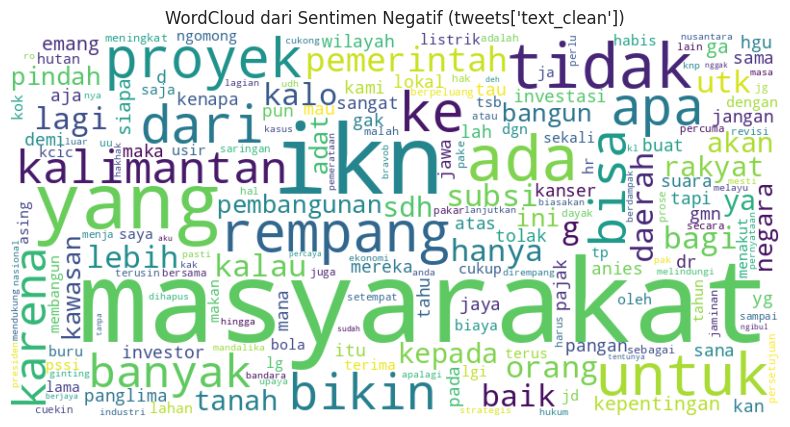

In [14]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Filter hanya sentimen negatif
negative_tweets = tweets[tweets['polarity'] == 'negative']

# Menggabungkan semua teks dari sentimen negatif menjadi satu teks
all_negative_text = ' '.join(negative_tweets['text_clean'])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_negative_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud dari Sentimen Negatif (tweets['text_clean'])")
plt.show()


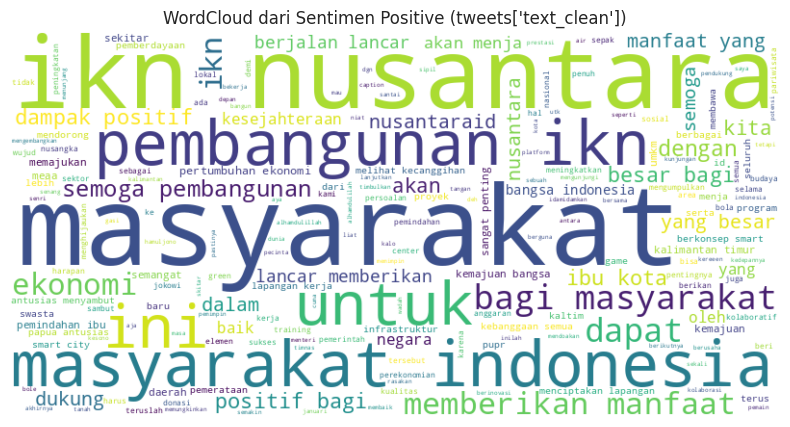

In [15]:


# Filter hanya sentimen positive
negative_tweets = tweets[tweets['polarity'] == 'positive']

# Menggabungkan semua teks dari sentimen positive menjadi satu teks
all_negative_text = ' '.join(negative_tweets['text_clean'])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_negative_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud dari Sentimen Positive (tweets['text_clean'])")
plt.show()


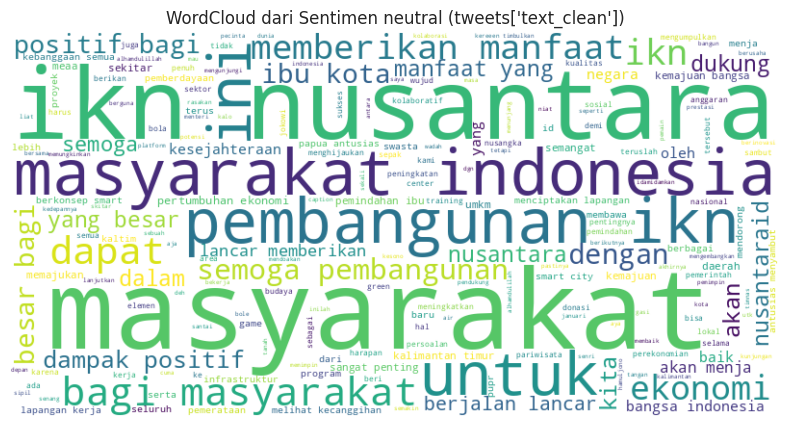

In [16]:
# Filter hanya sentimen neutral
negative_tweets = tweets[tweets['polarity'] == 'positive']

# Menggabungkan semua teks dari sentimen neutral menjadi satu teks
all_negative_text = ' '.join(negative_tweets['text_clean'])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_negative_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud dari Sentimen neutral (tweets['text_clean'])")
plt.show()


## Comparasion Sentiment on Tweets Data

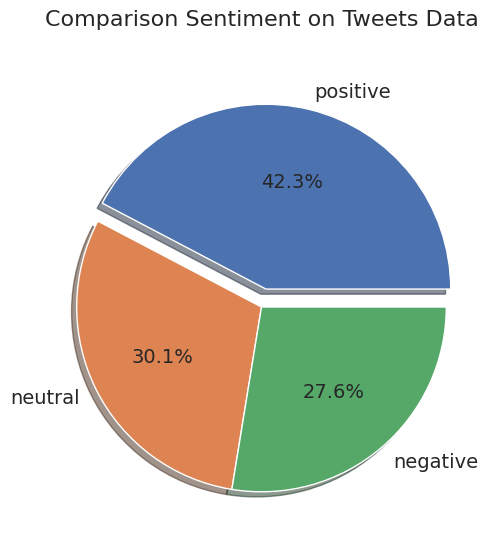

In [17]:
# fig, ax = plt.subplots(figsize = (6, 6))
# sizes = [count for count in tweets['polarity'].value_counts()]
# labels = list(tweets['polarity'].value_counts().index)
# explode = (0.1, 0, 0)
# ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
# ax.set_title('Comparison Sentiment on Tweets Data \n ', fontsize = 16, pad = 20)
# plt.show()
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
sizes = [count for count in tweets['polarity'].value_counts()]
labels = list(tweets['polarity'].value_counts().index)
explode = (0.1, 0, 0)

# Menambahkan shadow (bayangan) pada pie chart
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14}, shadow=True)

ax.set_title('Comparison Sentiment on Tweets Data\n', fontsize=16, pad=20)
plt.show()


# Data Splitting


In [18]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [19]:
# Combine the list of words into a single string for each tweet
tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(lambda x: ' '.join(x))

# Extract the text_preprocessed column as a list of strings
X = tweets['text_preprocessed'].tolist()
y = tweets['polarity']

# Now, you can use TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the data into training and testing sets (if needed)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


# Final Test

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definisikan kumpulan parameter yang ingin Anda telusuri
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')

# Latih model dengan data pelatihan
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik yang ditemukan oleh grid search
print("Best Parameters:", grid_search.best_params_)

# Cetak akurasi terbaik yang ditemukan oleh grid search
print("Best Accuracy:", grid_search.best_score_)

# Prediksi menggunakan model terbaik yang ditemukan
best_decision_tree = grid_search.best_estimator_
y_pred_best_decision_tree = best_decision_tree.predict(X_test)

# Evaluasi model terbaik
accuracy_best_decision_tree = accuracy_score(y_test, y_pred_best_decision_tree)
print(f"Best Decision Tree Classifier Accuracy: {accuracy_best_decision_tree}")

# Confusion Matrix untuk model terbaik
confusion_best_decision_tree = confusion_matrix(y_test, y_pred_best_decision_tree)
print("\nBest Decision Tree Classifier Confusion Matrix:\n", confusion_best_decision_tree)

# Classification Report untuk model terbaik
report_best_decision_tree = classification_report(y_test, y_pred_best_decision_tree)
print("\nBest Decision Tree Classifier Classification Report:\n", report_best_decision_tree)


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Accuracy: 0.5806666666666668
Best Decision Tree Classifier Accuracy: 0.75

Best Decision Tree Classifier Confusion Matrix:
 [[ 9  1  0]
 [ 1  3  5]
 [ 0  1 12]]

Best Decision Tree Classifier Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.90      0.90        10
     neutral       0.60      0.33      0.43         9
    positive       0.71      0.92      0.80        13

    accuracy                           0.75        32
   macro avg       0.74      0.72      0.71        32
weighted avg       0.74      0.75      0.73        32



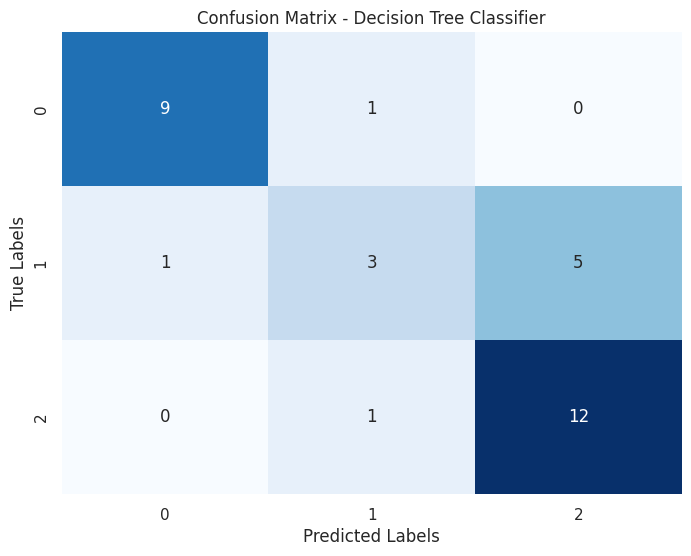

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_best_decision_tree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()


In [22]:
from sklearn.model_selection import GridSearchCV

# Definisikan kumpulan parameter yang ingin Anda telusuri
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=10, scoring='accuracy')

# Latih model dengan data pelatihan
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik yang ditemukan oleh grid search
print("Best Parameters:", grid_search.best_params_)

# Cetak akurasi terbaik yang ditemukan oleh grid search
print("Best Accuracy:", grid_search.best_score_)

# Prediksi menggunakan model terbaik yang ditemukan
best_decision_tree = grid_search.best_estimator_
y_pred_best_decision_tree = best_decision_tree.predict(X_test)

# Evaluasi model terbaik
accuracy_best_decision_tree = accuracy_score(y_test, y_pred_best_decision_tree)
print(f"Best Decision Tree Classifier Accuracy: {accuracy_best_decision_tree}")

# Confusion Matrix untuk model terbaik
confusion_best_decision_tree = confusion_matrix(y_test, y_pred_best_decision_tree)
print("\nBest Decision Tree Classifier Confusion Matrix:\n", confusion_best_decision_tree)

# Classification Report untuk model terbaik
report_best_decision_tree = classification_report(y_test, y_pred_best_decision_tree)
print("\nBest Decision Tree Classifier Classification Report:\n", report_best_decision_tree)


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Accuracy: 0.6057692307692307
Best Decision Tree Classifier Accuracy: 0.8125

Best Decision Tree Classifier Confusion Matrix:
 [[10  0  0]
 [ 1  3  5]
 [ 0  0 13]]

Best Decision Tree Classifier Classification Report:
               precision    recall  f1-score   support

    negative       0.91      1.00      0.95        10
     neutral       1.00      0.33      0.50         9
    positive       0.72      1.00      0.84        13

    accuracy                           0.81        32
   macro avg       0.88      0.78      0.76        32
weighted avg       0.86      0.81      0.78        32



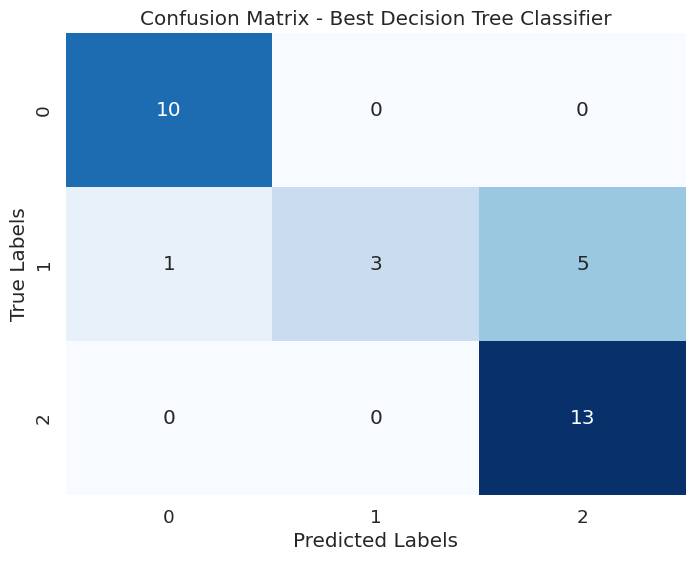

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi menggunakan model terbaik yang ditemukan
best_decision_tree = grid_search.best_estimator_
y_pred_best_decision_tree = best_decision_tree.predict(X_test)

# Matriks Konfusi (Confusion Matrix)
confusion_best_decision_tree = confusion_matrix(y_test, y_pred_best_decision_tree)

# Membuat heatmap untuk matriks kebingungan
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Mengatur ukuran font

# Membuat heatmap dengan annotasi
sns.heatmap(confusion_best_decision_tree, annot=True, fmt="d", cmap="Blues", cbar=False)

# Menambahkan label sumbu x dan y
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Menambahkan judul
plt.title('Confusion Matrix - Best Decision Tree Classifier')

plt.show()
